In [1]:
# pip install PyWavelets

In [2]:
# pip install opencv-python

In [3]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
img = cv2.imread('./test_images/cr2.jpg')
img.shape # (x,y,rgb)
# rgb intensity value for each pixel varies from 0 to 255

(168, 300, 3)

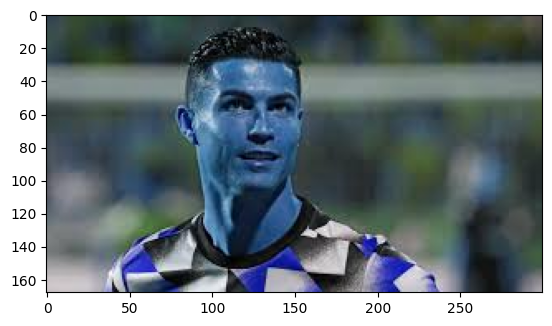

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(168, 300)

In [7]:
gray

array([[ 66,  66,  66, ...,  83,  83,  82],
       [ 66,  67,  67, ...,  82,  82,  82],
       [ 68,  68,  68, ...,  81,  81,  80],
       ...,
       [199, 199, 200, ..., 156, 160, 163],
       [197, 197, 197, ..., 160, 164, 167],
       [195, 195, 195, ..., 163, 166, 169]], dtype=uint8)

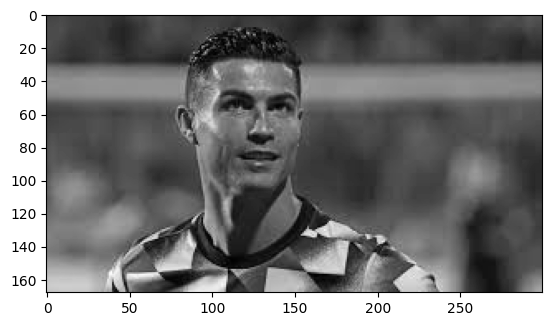

In [8]:
plt.imshow(gray,cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier(".\opencv\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(".\opencv\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray)
faces # [x,y,width,height]

array([[92, 27, 75, 75]])

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(92, 27, 75, 75)

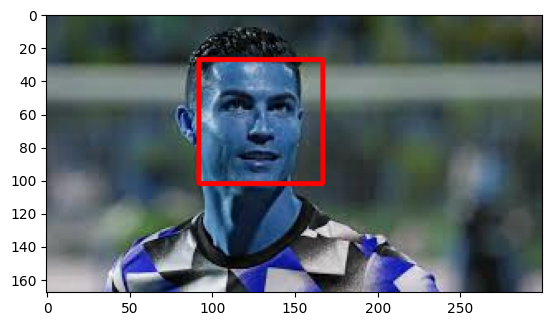

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) # (image,starting,ending,rgb,linewidth)
plt.imshow(face_img)

In [12]:
# cv2.destroyAllWindows()
# roi_gray = gray[y:y+h,x:x+w]
# roi_color = face_img[y:y+h,x:x+w]
# eyes = eye_cascade.detectMultiScale(roi_gray)
# eyes

In [13]:
# (ex,ey,ew,eh) = eyes
# ex,ey,ew,eh

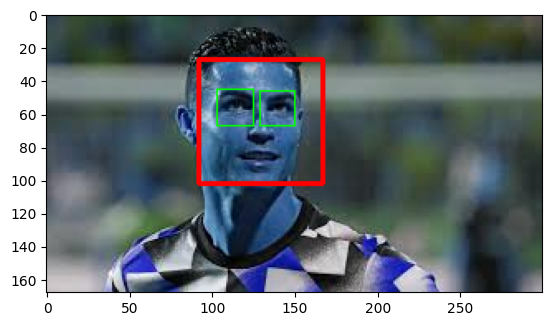

In [14]:
for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h,x:x+w] # region of interest
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0))
plt.imshow(face_img,cmap='gray')

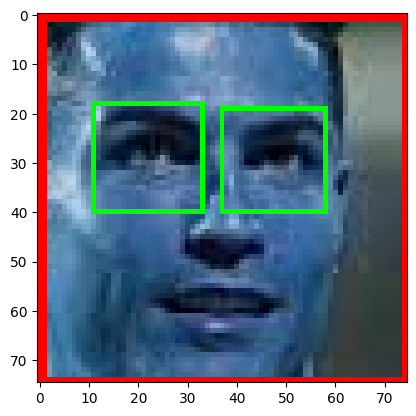

In [15]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [16]:
eyes

array([[11, 18, 22, 22],
       [37, 19, 21, 21]])

In [17]:
def get_cropped_image_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
# the code returns the first person's image containing 2 eyes, 
# that might or might not be the celebrity

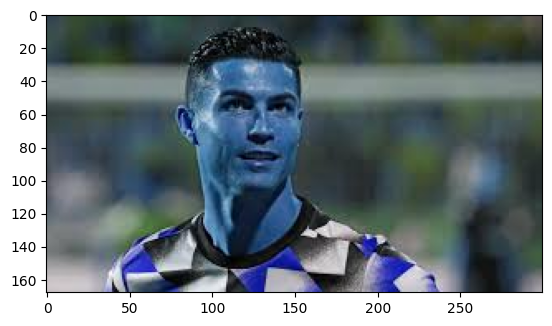

In [18]:
original_image = cv2.imread('./test_images/cr2.jpg')
plt.imshow(original_image)

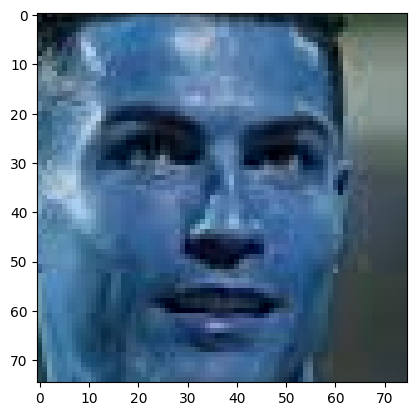

In [19]:
cropped_image = get_cropped_image_2_eyes('./test_images/cr2.jpg')
plt.imshow(cropped_image)

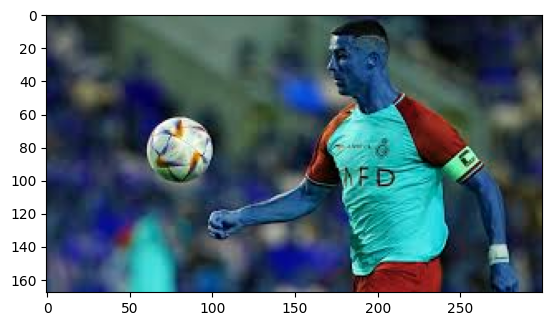

In [20]:
obstructed_image = cv2.imread('./test_images/cr3.jpg')
plt.imshow(obstructed_image)

In [21]:
obstructed_cropped_image = get_cropped_image_2_eyes('./test_images/cr3.jpg')
obstructed_cropped_image # no image

# Implementation for all the images

In [22]:
path_to_data = "./images_dataset/"
path_to_cropped_data = "./images_dataset/cropped/"

In [23]:
# fetching the already existing images folders
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [24]:
print(img_dirs)

['./images_dataset/cropped', './images_dataset/lionel_messi', './images_dataset/maria_sharapova', './images_dataset/roger_federer', './images_dataset/serena_williams', './images_dataset/virat_kohli']


In [25]:
# creating a directory for cropped images
import shutil
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [26]:
# creating folders in cropped folder for different sports celebrities
cropped_image_dirs = []
celeb_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celeb_name = img_dir.split('/')[-1]
    celeb_file_names_dict[celeb_name] = []
    # print(celeb_name)

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_2_eyes(entry.path)
        if roi_color is None:
            continue
 
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + celeb_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder) # makedirs creates the intermediate directories that don't yet exist in the path of the subdir
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celeb_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path,roi_color) # (filepath,img)
            celeb_file_names_dict[celeb_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./images_dataset/cropped/lionel_messi
Generating cropped images in folder:  ./images_dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./images_dataset/cropped/roger_federer
Generating cropped images in folder:  ./images_dataset/cropped/serena_williams
Generating cropped images in folder:  ./images_dataset/cropped/virat_kohli


# Part 4

In [31]:
# wavelet transformation - provides us with the important facial features(fine details so that we can differentiate between different faces
# Frequency and  Fourier Transform - a part of signal processing
# Fourier Transform - It is basically used to cancel out the noises and amplify some freauencies or suppress certain frequencies

In [32]:
# from Stack Overflow 
# wavelet transformation
import pywt
import cv2

def w2d(img,mode='haar',level=1):
    imArray = img
    # Datatype conversions
    # convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_BGR2GRAY)
    # convert to float
    imArray = np.float32(imArray)
    imArray /= 255 # Normalization to ensure same scale for wavelet transform of different images
    
    # Compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    # Process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    # reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

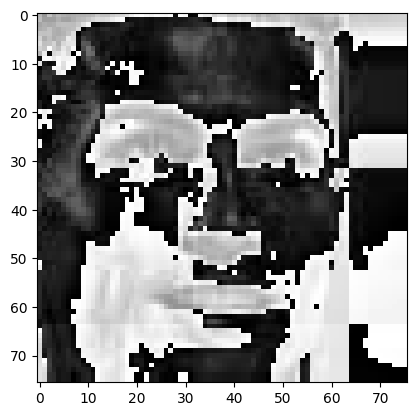

In [33]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap="gray")

In [35]:
# manually examine cropped folder and delete any unwanted images
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./images_dataset/cropped/lionel_messi\\lionel_messi1.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi10.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi11.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi12.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi14.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi15.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi16.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi17.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi18.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi19.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi2.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi20.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi21.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi23.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi24.png',
  './images_dataset/cropped/lionel_messi\

In [36]:
# vertical stacking of raw image and wavelet transformed image
# both the images provide with some features so we do this vertical stacking
count = 0
class_dict = {}
for celeb_name in celebrity_file_names_dict.keys():
    class_dict[celeb_name] = count
    count += 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [37]:
X, y = [], [] # for model training
for celeb_name,training_files in celeb_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32,32)) # same sized raw images
        img_har = w2d(img,'db1',5) # wavelet transformed img
        scaled_img_har = cv2.resize(img_har, (32,32)) # same sized wavelet tranformed image
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32*1,1))) # vertical stacking
        X.append(combined_img)
        y.append(class_dict[celeb_name])

In [38]:
len(X[0])
# 32*32*3(for raw image) + 32*32*1(for transformed img)

4096

In [39]:
len(X) # total images in the folder

178

In [40]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape 

(178, 4096)

In [41]:
X # converted to float to avoid errors and warnings further produced by sklearn lib

array([[ 12.,  14.,   5., ..., 202., 200., 203.],
       [ 55.,  49.,  53., ...,  62., 254., 247.],
       [ 44.,  48.,  56., ..., 237., 244., 239.],
       ...,
       [212., 223., 227., ..., 218., 220., 242.],
       [252., 252., 252., ..., 113., 113.,   0.],
       [ 22.,  21.,  30., ...,  66.,  88., 168.]])

# Part 5

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.30,random_state=42)

In [44]:
pipe = make_pipeline(StandardScaler(),SVC(kernel="rbf",C=10))
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=10))])

In [45]:
pipe.score(xtest,ytest)

0.8888888888888888

In [46]:
from sklearn.metrics import classification_report

In [47]:
ypred = pipe.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.92      0.92      0.92        12
           2       0.75      1.00      0.86         6
           3       0.88      0.78      0.82         9
           4       0.93      0.93      0.93        14

    accuracy                           0.89        54
   macro avg       0.88      0.89      0.88        54
weighted avg       0.89      0.89      0.89        54



# Applying GridSearchCV to find the best model and best parameters

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [49]:
model_params = {
    "svm": {
        "model": SVC(gamma="auto",probability=True),
        "params": {
            "svc__C" : [1,10,100,1000],
            "svc__kernel": ["rbf","linear","poly"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "randomforestclassifier__n_estimators": [1,5,10]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(solver="liblinear"),
        "params": {
            "logisticregression__C": [1,5,10]
        }
    }
}

In [50]:
scores = []
best_estimators = {}
for model,mp in model_params.items():
    pipe = make_pipeline(StandardScaler(),mp["model"])
    clf = GridSearchCV(pipe,mp["params"],cv=5,return_train_score=False)
    clf.fit(xtrain,ytrain)
    scores.append({
        "model": model,
        "best_params": clf.best_params_,
        "best_score": clf.best_score_
    })
    best_estimators[model] = clf.best_estimator_

In [51]:
pd.DataFrame(scores)

,model,best_params,best_score
0,svm,"{'svc__C': 1, 'svc__kernel': 'linear'}",0.821667
1,Random Forest,{'randomforestclassifier__n_estimators': 10},0.581333
2,Logistic Regression,{'logisticregression__C': 10},0.829000


In [52]:
best_estimators["svm"].score(xtest,ytest)

0.9444444444444444

In [53]:
best_estimators["Logistic Regression"].score(xtest,ytest)

0.9074074074074074

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,best_estimators["svm"].predict(xtest))
cm

array([[12,  1,  0,  0,  0],
       [ 0, 12,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  2,  7,  0],
       [ 0,  0,  0,  0, 14]], dtype=int64)

Text(50.722222222222214, 0.5, 'True')

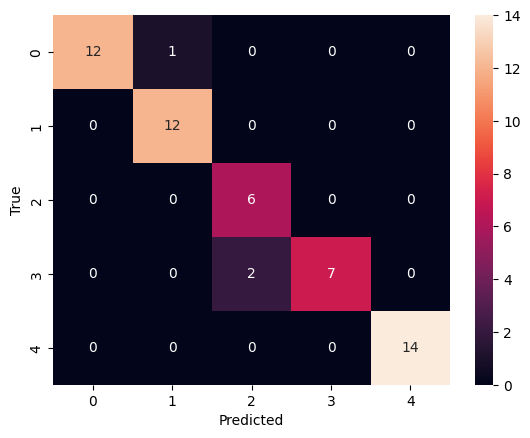

In [55]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [56]:
print(classification_report(ytest,best_estimators["svm"].predict(xtest)))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      1.00      0.96        12
           2       0.75      1.00      0.86         6
           3       1.00      0.78      0.88         9
           4       1.00      1.00      1.00        14

    accuracy                           0.94        54
   macro avg       0.93      0.94      0.93        54
weighted avg       0.96      0.94      0.94        54



# saving the model as a pickle file using joblib

In [57]:
import joblib

In [58]:
joblib.dump(best_estimators["svm"],"save_model.pkl")

['save_model.pkl']

In [59]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))